In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [3]:
ic50 = pd.read_csv("../data/drug/ic50_processed_median.csv")

In [4]:
def plot_best_params(df):
    fig, ax = plt.subplots((df.columns.size - 2) // 2 + 1,
                           2,
                           figsize=(15, 4 * ((df.columns.size - 2) // 2 + 1)))
    count = 0
    for col in df.columns:
        if col != 'Drug Id':
            if (df.columns.size - 1) <= 2:
                sns.countplot(df[col], ax=ax[count])
            else:
                sns.countplot(df[col], ax=ax[count // 2, count % 2])
            count += 1

# tissue type - baseline

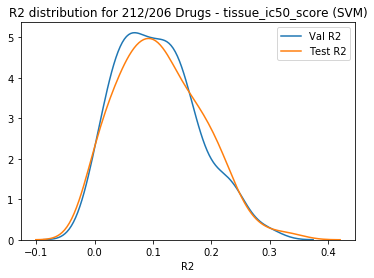

In [128]:
tissue_ic50_score = pd.read_csv("../work_dirs/meta_info/tissue_ic50/ElasticNet/scores_202003231213.csv")

sns.distplot(tissue_ic50_score['val_score'], hist=False, label='Val R2')
sns.distplot(tissue_ic50_score['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - tissue_ic50_score (SVM)')
plt.xlabel("R2")
plt.show()

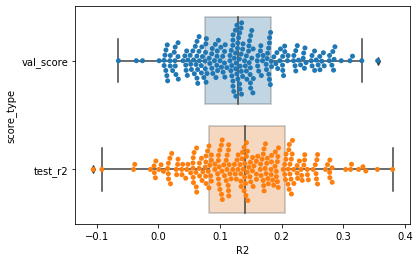

In [47]:
tissue_type_df = pd.melt(tissue_ic50_score[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=tissue_type_df,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=tissue_type_df, orient='h')

# RNA - baseline

## Elastic Net

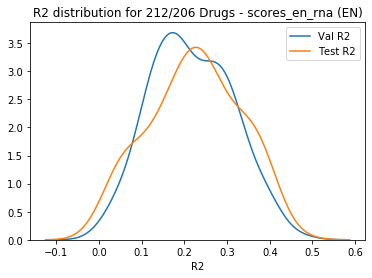

In [48]:
scores_en_rna = pd.read_csv("../work_dirs/rna/ElasticNet/scores_202003141741.csv")

sns.distplot(scores_en_rna['val_score'], hist=False, label='Val R2')
sns.distplot(scores_en_rna['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_en_rna (EN)')
plt.xlabel("R2")
plt.show()

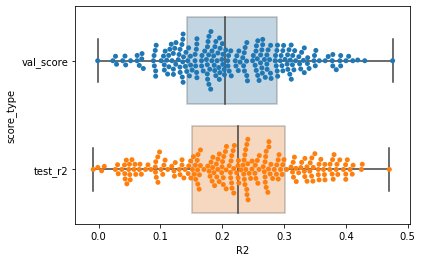

In [49]:
en_rna = pd.melt(scores_en_rna[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=en_rna,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=en_rna, orient='h')

# protein

## raw

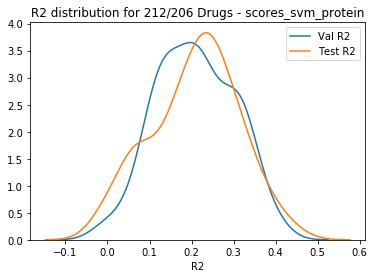

In [50]:
scores_svm_protein = pd.read_csv("../work_dirs/protein/SVM/scores_202003141147.csv")

sns.distplot(scores_svm_protein['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_protein['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_protein')
plt.xlabel("R2")
plt.show()

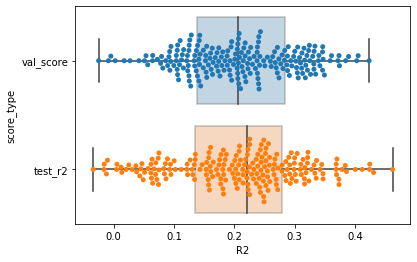

In [51]:
svm_protein = pd.melt(scores_svm_protein[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_protein,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_protein, orient='h')

## median normalised

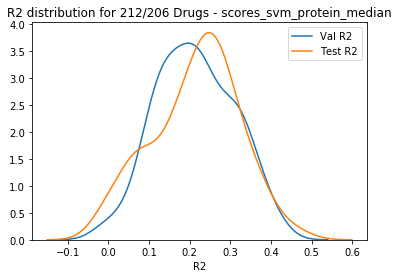

In [52]:
scores_svm_protein_median = pd.read_csv("../work_dirs/protein_median/SVM/scores_202003141549.csv")

sns.distplot(scores_svm_protein_median['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_protein_median['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_protein_median')
plt.xlabel("R2")
plt.show()

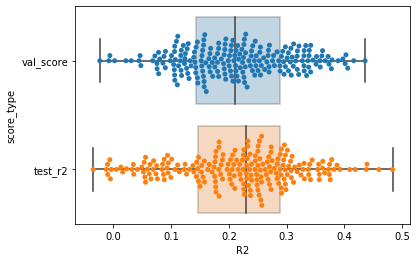

In [53]:
svm_protein_median = pd.melt(scores_svm_protein_median[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_protein_median,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_protein_median, orient='h')

## RUV normalised

## min-max scaled data

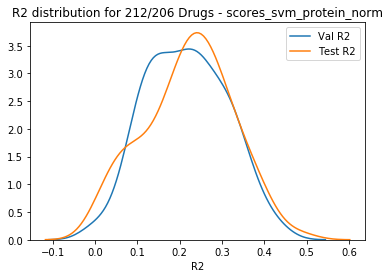

In [54]:
scores_svm_protein_norm = pd.read_csv("../work_dirs/protein_median/SVM/scores_202003161600.csv")

sns.distplot(scores_svm_protein_norm['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_protein_norm['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_protein_norm')
plt.xlabel("R2")
plt.show()

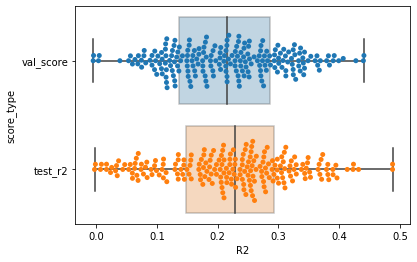

In [55]:
svm_protein_norm = pd.melt(
    scores_svm_protein_norm[['Drug Id', 'val_score', 'test_r2']],
    id_vars='Drug Id',
    value_vars=['val_score', 'test_r2'],
    var_name='score_type',
    value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_protein_norm,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_protein_norm, orient='h')

In [56]:
scores_svm_protein_norm['test_corr'].mean()

0.47301037174333876

In [57]:
scores_svm_protein_norm['test_r2'].mean()

0.22059981489626168

In [58]:
scores_svm_protein_norm['test_mae'].mean()

0.10135885983526934

# peptide(filter 50%)

only select peptides that exist in more than 50% of samples

## raw

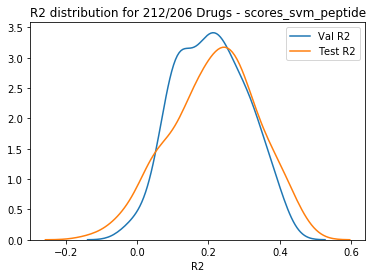

In [59]:
scores_svm_peptide = pd.read_csv("../work_dirs/peptide/SVM/scores_202003142030.csv")

sns.distplot(scores_svm_peptide['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_peptide['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_peptide')
plt.xlabel("R2")
plt.show()

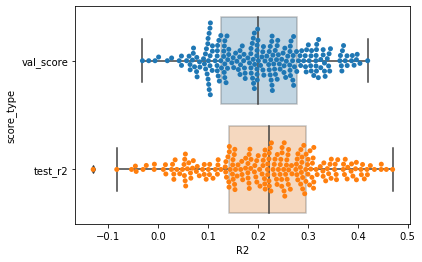

In [60]:
svm_peptide = pd.melt(scores_svm_peptide[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_peptide,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_peptide, orient='h')

## median normalised

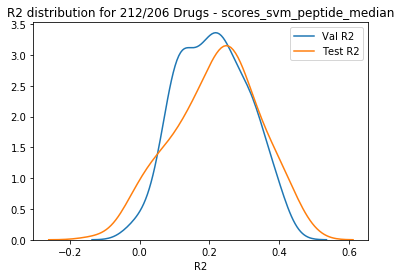

In [61]:
scores_svm_peptide_median = pd.read_csv("../work_dirs/peptide_median/SVM/scores_202003161534.csv")

sns.distplot(scores_svm_peptide_median['val_score'], hist=False, label='Val R2')
sns.distplot(scores_svm_peptide_median['test_r2'], hist=False, label='Test R2')
plt.legend()
plt.title('R2 distribution for 212/206 Drugs - scores_svm_peptide_median')
plt.xlabel("R2")
plt.show()

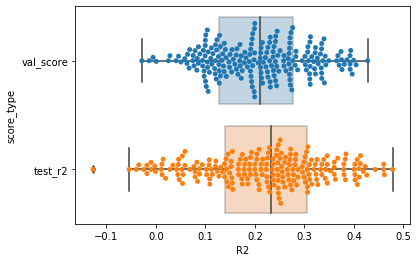

In [62]:
svm_peptide_median = pd.melt(scores_svm_peptide_median[['Drug Id', 'val_score',
                                            'test_r2']],
                         id_vars='Drug Id',
                         value_vars=['val_score', 'test_r2'],
                         var_name='score_type',
                         value_name='R2')
ax = sns.boxplot('R2',
                 'score_type',
                 data=svm_peptide_median,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('R2', 'score_type', data=svm_peptide_median, orient='h')

## RUV normalised

# comparison

## test scores

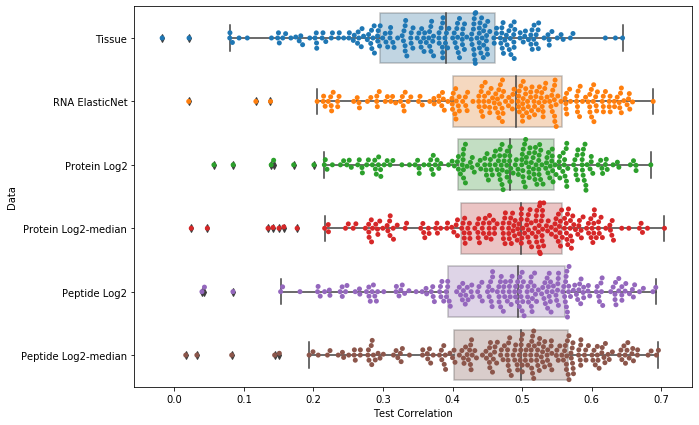

In [129]:
metric = 'test_corr'
tmp = pd.DataFrame({
    'Drug Id': tissue_ic50_score['Drug Id'],
    'Tissue': tissue_ic50_score[metric],
    'RNA ElasticNet': scores_en_rna[metric],
    'Protein Log2': scores_svm_protein[metric],
    'Protein Log2-median': scores_svm_protein_median[metric],
    'Peptide Log2': scores_svm_peptide[metric],
    'Peptide Log2-median': scores_svm_peptide_median[metric]
})
tmp_melt = pd.melt(tmp, id_vars=['Drug Id'], var_name='Data', value_name='Test Correlation')

plt.figure(figsize=(10,7))
ax = sns.boxplot('Test Correlation',
                 'Data',
                 data=tmp_melt,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('Test Correlation', 'Data', data=tmp_melt, orient='h')

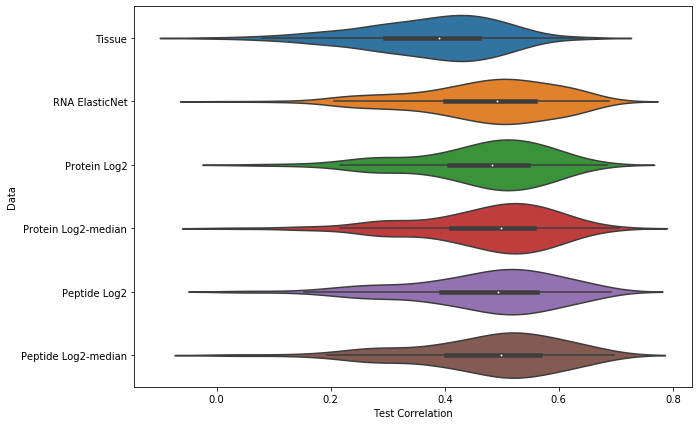

In [130]:
plt.figure(figsize=(10, 7))
ax = sns.violinplot('Test Correlation',
                    'Data',
                    data=tmp_melt,
                    orient='h',
                    boxprops=dict(alpha=.3))

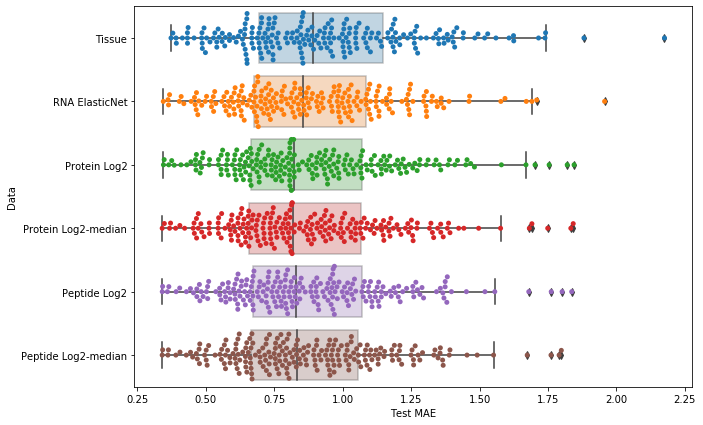

In [66]:
metric = 'test_mae'
tmp = pd.DataFrame({
    'Drug Id': tissue_ic50_score['Drug Id'],
    'Tissue': tissue_ic50_score[metric],
    'RNA ElasticNet': scores_en_rna[metric],
    'Protein Log2': scores_svm_protein[metric],
    'Protein Log2-median': scores_svm_protein_median[metric],
    'Peptide Log2': scores_svm_peptide[metric],
    'Peptide Log2-median': scores_svm_peptide_median[metric]
})
tmp_melt = pd.melt(tmp, id_vars=['Drug Id'], var_name='Data', value_name='Test MAE')

plt.figure(figsize=(10,7))
ax = sns.boxplot('Test MAE',
                 'Data',
                 data=tmp_melt,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('Test MAE', 'Data', data=tmp_melt, orient='h')

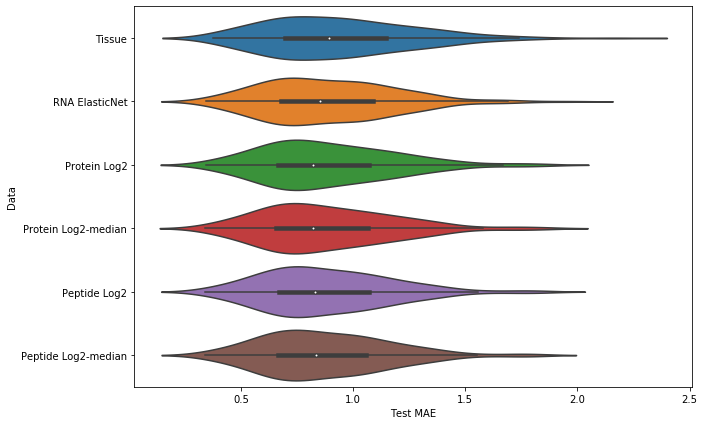

In [67]:
plt.figure(figsize=(10, 7))
ax = sns.violinplot('Test MAE',
                    'Data',
                    data=tmp_melt,
                    orient='h',
                    boxprops=dict(alpha=.3))

## validation

In [ ]:
tissue_ic50_score
scores_en_rna
scores_svm_protein
scores_svm_protein_median
scores_svm_peptide
scores_svm_peptide_median

In [131]:
cols = ['Drug Id', 'cv0_r2', 'cv1_r2', 'cv2_r2', 'cv3_r2', 'cv4_r2']
tissue_ic50_score_melt = pd.melt(tissue_ic50_score[cols],
                                 id_vars='Drug Id',
                                 var_name='CV',
                                 value_name='CV R2')
tissue_ic50_score_melt['Data'] = 'Tissue'

scores_en_rna_melt = pd.melt(scores_en_rna[cols],
                             id_vars='Drug Id',
                             var_name='CV',
                             value_name='CV R2')
scores_en_rna_melt['Data'] = 'RNA ElasticNet'

scores_svm_protein_melt = pd.melt(scores_svm_protein[cols],
                                  id_vars='Drug Id',
                                  var_name='CV',
                                  value_name='CV R2')
scores_svm_protein_melt['Data'] = 'Protein Log2'

scores_svm_protein_median_melt = pd.melt(scores_svm_protein_median[cols],
                                         id_vars='Drug Id',
                                         var_name='CV',
                                         value_name='CV R2')
scores_svm_protein_median_melt['Data'] = 'Protein Log2-median'

scores_svm_peptide_melt = pd.melt(scores_svm_peptide[cols],
                                  id_vars='Drug Id',
                                  var_name='CV',
                                  value_name='CV R2')
scores_svm_peptide_melt['Data'] = 'Peptide Log2'

scores_svm_peptide_median_melt = pd.melt(scores_svm_peptide_median[cols],
                                         id_vars='Drug Id',
                                         var_name='CV',
                                         value_name='CV R2')
scores_svm_peptide_median_melt['Data'] = 'Peptide Log2-median'

combined_val = pd.concat([
    tissue_ic50_score_melt, scores_en_rna_melt, scores_svm_protein_melt,
    scores_svm_protein_median_melt, scores_svm_peptide_melt,
    scores_svm_peptide_median_melt
])

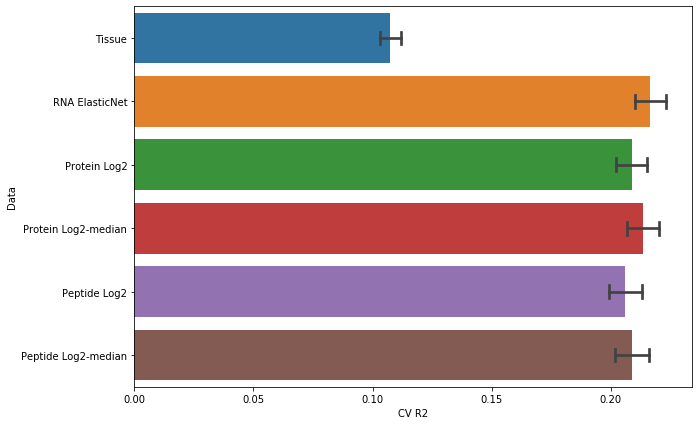

In [132]:
plt.figure(figsize=(10,7))
sns.barplot(y='Data',x='CV R2', data=combined_val, capsize=.2)

In [133]:
combined_val.groupby(['Data'])['CV R2'].agg('std') / combined_val.groupby(['Data'])['CV R2'].agg('mean')

Data
Peptide Log2           0.565403
Peptide Log2-median    0.559545
Protein Log2           0.525768
Protein Log2-median    0.524461
RNA ElasticNet         0.505844
Tissue                 0.684068
Name: CV R2, dtype: float64

# scaled comparison

## min 900 cell lines

### svm protein

In [88]:
scores_svm_protein_norm = pd.read_csv("../work_dirs/protein_median_norm/SVM/scores_202003211516.csv")
print(scores_svm_protein_norm['test_corr'].median())

print(scores_svm_protein_norm['test_r2'].median())

print(scores_svm_protein_norm['test_mae'].median())

0.4791155432091592
0.21004027423468602
0.10184090134631804


### en rna

In [89]:
scores_en_rna_norm = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202003211813.csv")
print(scores_en_rna_norm['test_corr'].median())
print(scores_en_rna_norm['test_r2'].median())
print(scores_en_rna_norm['test_mae'].median())

0.48561372990061097
0.22492467746466444
0.09831734092077507


### multi-drug

In [90]:
scores_multi_protein_norm = pd.read_csv(
    "../work_dirs/protein/MultiDrug/scores_202003211501_full_resx_1x2000x4000.csv"
)

In [91]:
scores_multi_protein_norm_test = scores_multi_protein_norm[
    scores_multi_protein_norm['run'] == 'test'].reset_index(drop=True)

In [92]:
max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

max_epoch[max_epoch['corr']==max_epoch['corr'].max()]

,epoch,corr
100,101,0.492364


In [93]:
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==101].head()

,Drug Id,run,epoch,corr,mae
21200,152,test,101,0.439823,0.114265
21201,179,test,101,0.626952,0.133210
21202,193,test,101,0.278498,0.050179
21203,196,test,101,0.503869,0.114614
21204,203,test,101,0.490299,0.091773


In [94]:
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==139]['corr'].median()

0.4887068815514573

### all together

In [95]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==139][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

Text(0.5, 1.0, 'Test set correlation on 212 drugs')

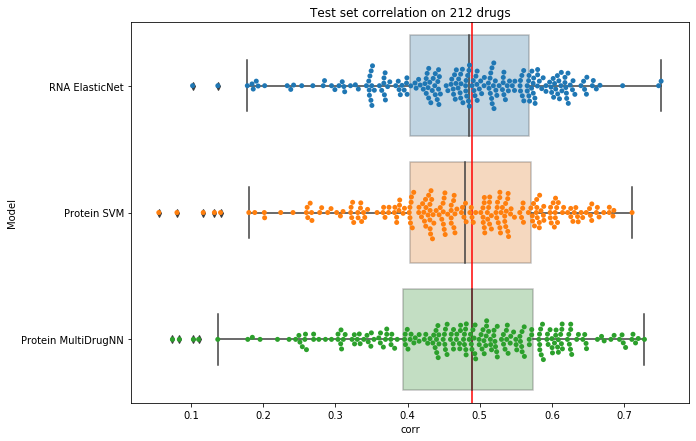

In [96]:
tmp = pd.DataFrame({
    'Drug Id': scores_svm_protein_norm['Drug Id'],
    'RNA ElasticNet': scores_en_rna_norm['test_corr'],
    'Protein SVM': scores_svm_protein_norm['test_corr'],
})
tmp_melt = pd.melt(tmp,
                   id_vars=['Drug Id'],
                   var_name='Model',
                   value_name='corr')
tmp_melt = pd.concat([tmp_melt, multi_res], sort=False)

plt.figure(figsize=(10, 7))
ax = sns.boxplot('corr',
                 'Model',
                 data=tmp_melt,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('corr', 'Model', data=tmp_melt, orient='h')
x = tmp_melt[tmp_melt['Model']=='Protein MultiDrugNN']['corr'].median()
plt.plot([x, x], [-0.5,2.5], color='red')
plt.title("Test set correlation on 212 drugs")

Text(0.5, 1.0, 'Test set correlation on 212 drugs')

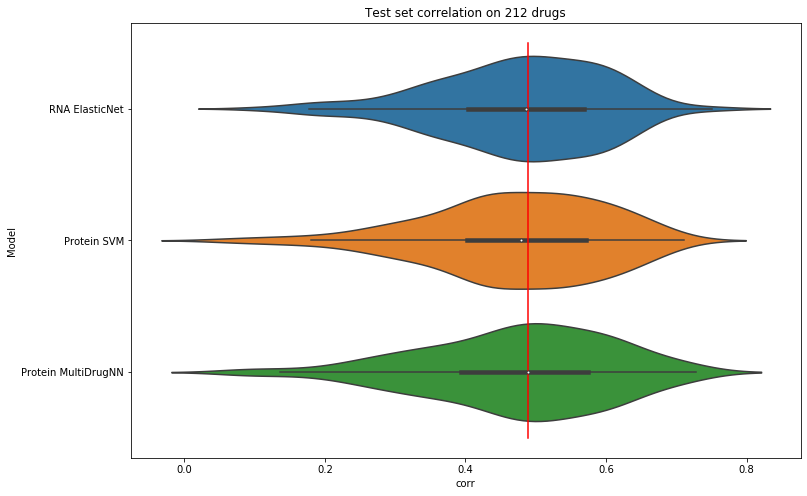

In [97]:
plt.figure(figsize=(12, 8))
sns.violinplot('corr', 'Model', data=tmp_melt, orient='h')
x = tmp_melt[tmp_melt['Model']=='MultiDrugNN']['corr'].median()+0.001
plt.plot([x, x], [-0.5,2.5], color='red')
x = tmp_melt[tmp_melt['Model']=='Protein MultiDrugNN']['corr'].median()
plt.plot([x, x], [-0.5,2.5], color='red')
plt.title("Test set correlation on 212 drugs")

### cross validation score

In [98]:
cols = ['Drug Id', 'cv0_r2', 'cv1_r2', 'cv2_r2', 'cv3_r2', 'cv4_r2']

scores_en_rna_norm_melt = pd.melt(scores_en_rna_norm[cols],
                             id_vars='Drug Id',
                             var_name='run',
                             value_name='CV R2')
scores_en_rna_norm_melt['Model'] = 'RNA ElasticNet'


scores_svm_protein_median_norm_melt = pd.melt(scores_svm_protein_norm[cols],
                                         id_vars='Drug Id',
                                         var_name='run',
                                         value_name='CV R2')
scores_svm_protein_median_norm_melt['Model'] = 'Protein SVM'


combined_val = pd.concat([
    scores_en_rna_norm_melt,scores_svm_protein_median_norm_melt
])

In [99]:
scores_multi_protein_norm_cv = scores_multi_protein_norm[
    (scores_multi_protein_norm['run'] != 'test')
    & (scores_multi_protein_norm['epoch'] == 139)].reset_index(drop=True)

In [100]:
scores_multi_protein_norm_cv['CV R2'] = scores_multi_protein_norm_cv['corr'] ** 2
scores_multi_protein_norm_cv['Model'] = 'Protein MultiDrugNN'

In [101]:
combined_val = pd.concat([combined_val, scores_multi_protein_norm_cv], sort=False)

Text(0.5, 1.0, 'Stability from CV scores')

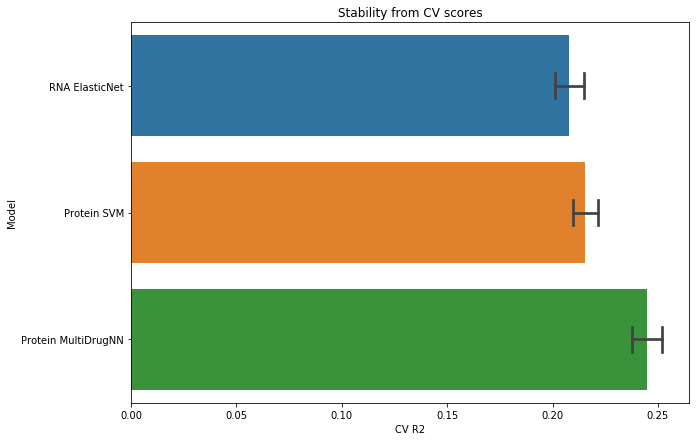

In [102]:
plt.figure(figsize=(10,7))
sns.barplot(y='Model',x='CV R2', data=combined_val, capsize=.2)
plt.title("Stability from CV scores")

In [103]:
print(combined_val[combined_val['Model']=='RNA ElasticNet']['CV R2'].std())
print(combined_val[combined_val['Model']=='Protein SVM']['CV R2'].std())
print(combined_val[combined_val['Model']=='Protein MultiDrugNN']['CV R2'].std())


0.11161766374446808
0.10607145063593232
0.11100847728340998


In [104]:
print(combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].std() /
      combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].mean())
print(combined_val[combined_val['Model'] == 'Protein SVM']['CV R2'].std()/
      combined_val[combined_val['Model'] == 'Protein SVM']['CV R2'].mean())
print(combined_val[combined_val['Model'] == 'Protein MultiDrugNN']
      ['CV R2'].std()/
      combined_val[combined_val['Model'] == 'Protein MultiDrugNN']['CV R2'].mean())

0.5366698165915031
0.4921759478185624
0.45331674168677966


## min 300 cell lines

In [5]:
scores_svm_protein_norm = pd.read_csv(
    "../work_dirs/protein_median_norm/SVM/scores_202003211829.csv")
print(scores_svm_protein_norm['test_corr'].median())
print(scores_svm_protein_norm['test_r2'].median())
print(scores_svm_protein_norm['test_mae'].median())

print(scores_svm_protein_norm['test_corr'].std() /
      scores_svm_protein_norm['test_corr'].mean())
print(scores_svm_protein_norm['test_r2'].std() /
      scores_svm_protein_norm['test_r2'].mean())
print(scores_svm_protein_norm['test_mae'].std() /
      scores_svm_protein_norm['test_mae'].mean())

0.47723624649751195
0.20861318710944066
0.10643501454485484
0.28102325435198366
0.5584655306297703
0.2317360291454704


In [6]:
scores_en_rna_norm = pd.read_csv("../work_dirs/rna_norm/ElasticNet/scores_202003211828.csv")
print(scores_en_rna_norm['test_corr'].median())
print(scores_en_rna_norm['test_r2'].median())
print(scores_en_rna_norm['test_mae'].median())

0.46817331937775336
0.2048522055929045
0.10579447070407516


In [7]:
scores_multi_protein_norm = pd.read_csv(
    "../work_dirs/protein/MultiDrug/scores_202003211831_full_resx_1x2000x4000_min300.csv"
)

In [8]:
scores_multi_protein_norm_test = scores_multi_protein_norm[
    scores_multi_protein_norm['run'] == 'test'].reset_index(drop=True)

In [9]:
max_epoch = scores_multi_protein_norm_test.groupby(['epoch']).median()['corr'].reset_index()

max_epoch[max_epoch['corr']==max_epoch['corr'].max()]

,epoch,corr
139,140,0.492702


In [10]:
scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch'] ==
                               139]['corr'].median()

0.4926174543715952

In [11]:
multi_res = scores_multi_protein_norm_test[scores_multi_protein_norm_test['epoch']==139][['Drug Id', 'corr']]
multi_res['Model'] = 'Protein MultiDrugNN'

Text(0.5, 1.0, 'Test set correlation on 446 drugs')

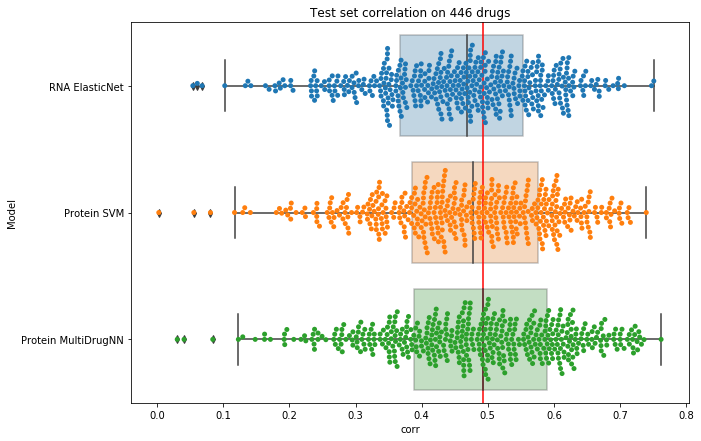

In [12]:
tmp = pd.DataFrame({
    'Drug Id': scores_svm_protein_norm['Drug Id'],
    'RNA ElasticNet': scores_en_rna_norm['test_corr'],
    'Protein SVM': scores_svm_protein_norm['test_corr'],
})
tmp_melt = pd.melt(tmp,
                   id_vars=['Drug Id'],
                   var_name='Model',
                   value_name='corr')
tmp_melt = pd.concat([tmp_melt, multi_res], sort=False)

plt.figure(figsize=(10, 7))
ax = sns.boxplot('corr',
                 'Model',
                 data=tmp_melt,
                 orient='h',
                 boxprops=dict(alpha=.3))
sns.swarmplot('corr', 'Model', data=tmp_melt, orient='h')
x = tmp_melt[tmp_melt['Model']=='Protein MultiDrugNN']['corr'].median()
plt.plot([x, x], [-0.5,2.5], color='red')
plt.title("Test set correlation on 446 drugs")

Text(0.5, 1.0, 'Test set correlation on 446 drugs')

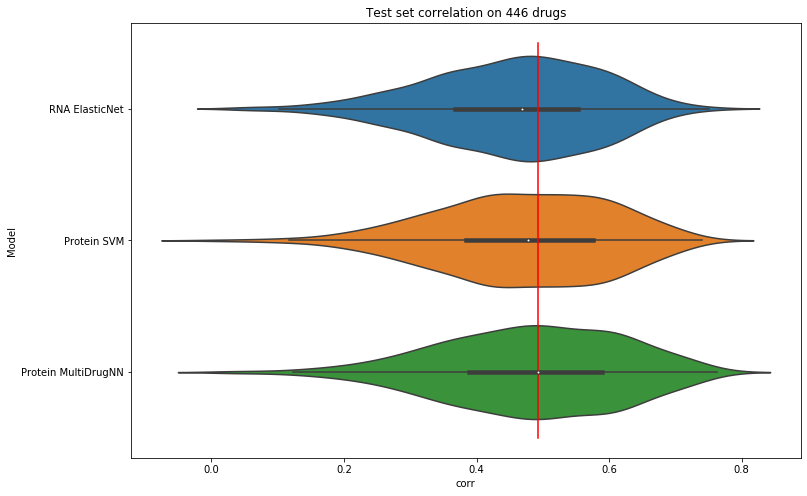

In [113]:
plt.figure(figsize=(12, 8))
sns.violinplot('corr', 'Model', data=tmp_melt, orient='h')
x = tmp_melt[tmp_melt['Model']=='MultiDrugNN']['corr'].median()+0.001
plt.plot([x, x], [-0.5,2.5], color='red')
x = tmp_melt[tmp_melt['Model']=='Protein MultiDrugNN']['corr'].median()
plt.plot([x, x], [-0.5,2.5], color='red')
plt.title("Test set correlation on 446 drugs")

### cross validation score

In [114]:
cols = ['Drug Id', 'cv0_r2', 'cv1_r2', 'cv2_r2', 'cv3_r2', 'cv4_r2']

scores_en_rna_norm_melt = pd.melt(scores_en_rna_norm[cols],
                             id_vars='Drug Id',
                             var_name='run',
                             value_name='CV R2')
scores_en_rna_norm_melt['Model'] = 'RNA ElasticNet'


scores_svm_protein_median_norm_melt = pd.melt(scores_svm_protein_norm[cols],
                                         id_vars='Drug Id',
                                         var_name='run',
                                         value_name='CV R2')
scores_svm_protein_median_norm_melt['Model'] = 'Protein SVM'


combined_val = pd.concat([
    scores_en_rna_norm_melt,scores_svm_protein_median_norm_melt
])

In [115]:
scores_multi_protein_norm_cv = scores_multi_protein_norm[
    (scores_multi_protein_norm['run'] != 'test')
    & (scores_multi_protein_norm['epoch'] == 139)].reset_index(drop=True)

In [116]:
scores_multi_protein_norm_cv['CV R2'] = scores_multi_protein_norm_cv['corr'] ** 2
scores_multi_protein_norm_cv['Model'] = 'Protein MultiDrugNN'

In [117]:
combined_val = pd.concat([combined_val, scores_multi_protein_norm_cv], sort=False)

Text(0.5, 1.0, 'Stability from CV scores')

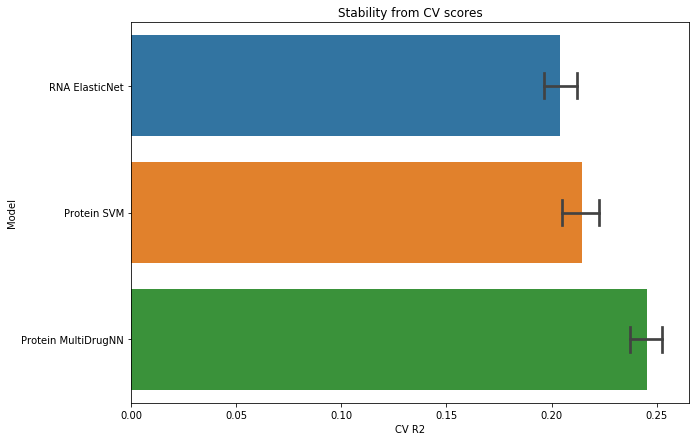

In [118]:
plt.figure(figsize=(10,7))
sns.barplot(y='Model',x='CV R2', data=combined_val,ci=100, capsize=.2)
plt.title("Stability from CV scores")

In [119]:
print(combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].std())
print(combined_val[combined_val['Model'] == 'Protein SVM']['CV R2'].std())
print(combined_val[combined_val['Model'] == 'Protein MultiDrugNN']
      ['CV R2'].std())

print(combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].std() /
      combined_val[combined_val['Model'] == 'RNA ElasticNet']['CV R2'].mean())
print(combined_val[combined_val['Model'] == 'Protein SVM']['CV R2'].std()/
      combined_val[combined_val['Model'] == 'Protein SVM']['CV R2'].mean())
print(combined_val[combined_val['Model'] == 'Protein MultiDrugNN']
      ['CV R2'].std()/
      combined_val[combined_val['Model'] == 'Protein MultiDrugNN']['CV R2'].mean())

0.12358954755795792
0.12033071454742729
0.11937805623813867
0.6052963784459514
0.5616702139567702
0.48667632649594217


## which drugs are improved？

In [45]:
drug_meta = pd.read_csv("../data/drug/screened_compunds_rel_8.2.csv")

In [46]:
drug_meta['TARGET_PATHWAY'].unique()

array(['EGFR signaling', 'PI3K/MTOR signaling', 'RTK signaling',
       'Protein stability and degradation', 'Mitosis', 'Other',
       'ERK MAPK signaling', 'Other, kinases', 'ABL signaling',
       'Cell cycle', 'IGF1R signaling', 'Chromatin histone acetylation',
       'Cytoskeleton', 'DNA replication', 'Hormone-related',
       'Genome integrity', 'WNT signaling', 'JNK and p38 signaling',
       'Chromatin other', 'Metabolism', 'Apoptosis regulation',
       'Chromatin histone methylation', 'p53 pathway', 'Unclassified'],
      dtype=object)

### compare with RNA

In [47]:
tmp = pd.merge(scores_en_rna_norm[['Drug Id','test_corr']], multi_res[['Drug Id','corr']])

tmp.columns = ['Drug Id', 'RNA_correlation', 'MultiDrug_correlation']

tmp['delta'] = tmp['MultiDrug_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])
tmp['improved'] = (tmp['MultiDrug_correlation'] > tmp['RNA_correlation']).astype(int)

delta_bar = tmp.groupby(['TARGET_PATHWAY'])['RNA_correlation','MultiDrug_correlation','delta'].mean().reset_index()

plt.figure(figsize=(12, 8))
g = sns.barplot(x='TARGET_PATHWAY', y='delta', data=delta_bar)
plt.xticks(rotation=45, ha='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

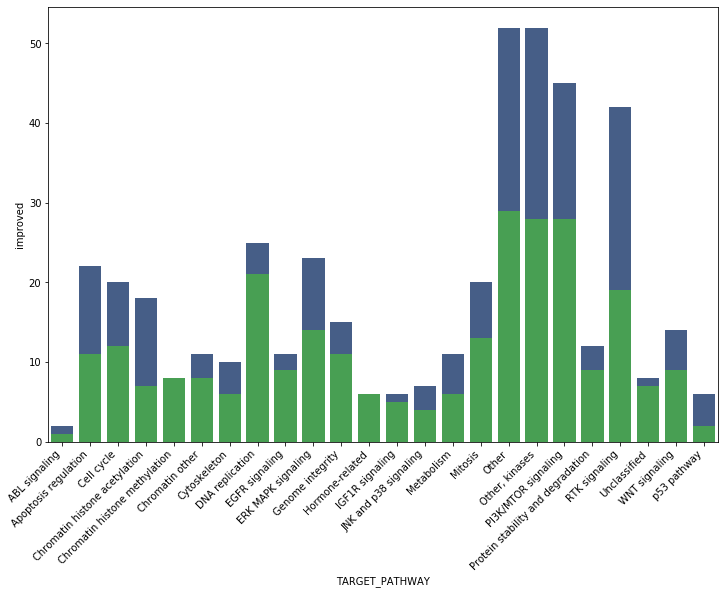

In [65]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].size().reset_index(),
                color=sns.xkcd_rgb["denim blue"])
g = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].sum().reset_index(),
                color=sns.xkcd_rgb["medium green"])
plt.xticks(rotation=45, ha='right')

### compare with protein SVM

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

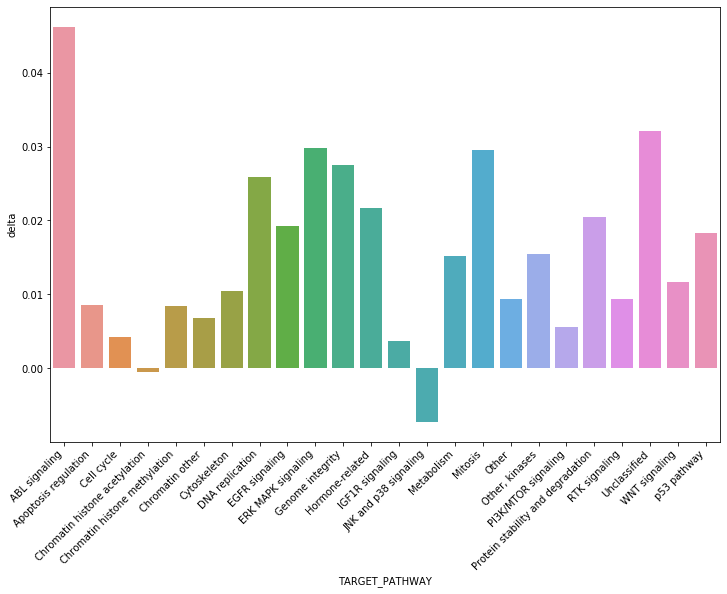

In [66]:
tmp = pd.merge(scores_svm_protein_norm[['Drug Id','test_corr']], multi_res[['Drug Id','corr']])

tmp.columns = ['Drug Id', 'RNA_correlation', 'MultiDrug_correlation']

tmp['delta'] = tmp['MultiDrug_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(tmp, drug_meta, left_on=['Drug Id'], right_on=['DRUG_ID'])
tmp['improved'] = (tmp['MultiDrug_correlation'] > tmp['RNA_correlation']).astype(int)

delta_bar = tmp.groupby(['TARGET_PATHWAY'])['RNA_correlation','MultiDrug_correlation','delta'].mean().reset_index()

plt.figure(figsize=(12, 8))
g = sns.barplot(x='TARGET_PATHWAY', y='delta', data=delta_bar)
plt.xticks(rotation=45, ha='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

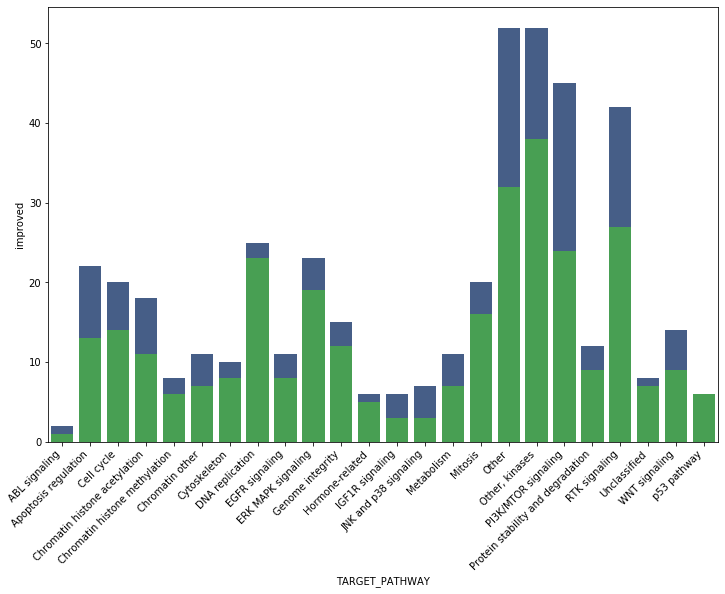

In [67]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].size().reset_index(),
                color=sns.xkcd_rgb["denim blue"])
g = sns.barplot(x='TARGET_PATHWAY',
                y='improved',
                data=tmp.groupby(['TARGET_PATHWAY'
                                  ])['improved'].sum().reset_index(),
                color=sns.xkcd_rgb["medium green"])
plt.xticks(rotation=45, ha='right')

In [71]:
drug_meta[drug_meta['DRUG_ID'] == 277]

,DRUG_ID,SCREENING_SITE,DRUG_NAME,SYNONYMS,TARGET,TARGET_PATHWAY
131,277,MGH,Linifanib,"ABT-869, ABT 869","VEGFR1, VEGFR2, VEGFR3, CSF1R, FLT3, KIT",RTK signaling
